Test 1.


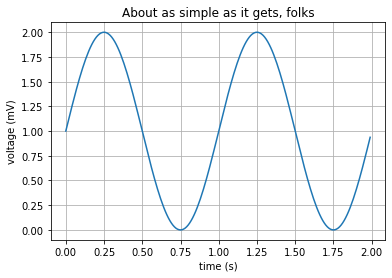

In [1]:
# copied and pasted from: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/simple_plot.html
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
fig.savefig("test.png")
plt.show()

In [2]:
!ls

sample_data  test.png


Image test
![test](https://github.com/Covid-Analytics/covidanalytics.org/blob/master/analysis/images/test.png?raw=1)

Im
![test](https://github.com/Covid-Analytics/covidanalytics.org/blob/master/analysis/test.png?raw=1)

A
![test](https://github.com/Covid-Analytics/covidanalytics.org/blob/master/analysis/test.png?raw=1)


In [3]:
import pandas as pd
from datetime import datetime, timedelta

# read the latest CSV file
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

# select 2 columns, rename, and parse the date
df = df.rename(columns={"data": 'day', "totale_casi": 'cases'})
df = df.loc[:, ['day', 'cases']]
first_day = datetime(2020, 1, 1) - timedelta(days=1)
df['day'] = df['day'].map(lambda x: (datetime.strptime(x, '%Y-%m-%dT%H:%M:%S') - first_day).days)

# the following block is just for displaying the input data, with some unused augmentation
dfG = df.copy()
dfG['cases_diff'] = dfG.diff()['cases']
dfG['cases_growth_%'] = round(dfG['cases_diff'] / (dfG['cases'] - dfG['cases_diff']) * 100, 1)
dfG['date'] = [first_day + timedelta(days = day) for day in dfG['day']]
print("...data for the last 7 days")
dfG[-7:]

...data for the last 7 days


,day,cases,cases_diff,cases_growth_%,date
24,79,41035,5322.0,14.9,2020-03-19
25,80,47021,5986.0,14.6,2020-03-20
26,81,53578,6557.0,13.9,2020-03-21
27,82,59138,5560.0,10.4,2020-03-22
28,83,63927,4789.0,8.1,2020-03-23
29,84,69176,5249.0,8.2,2020-03-24
30,85,74386,5210.0,7.5,2020-03-25


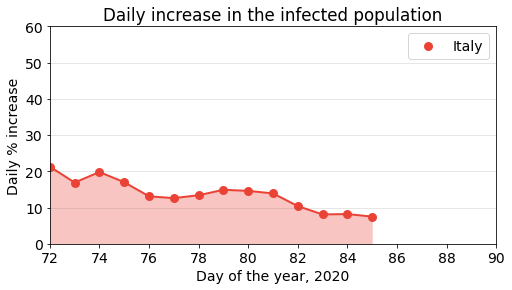

In [4]:
#@title { vertical-output: true, display-mode: "form" }
dfg2 = dfG[-14:]
x = dfg2['day'].tolist()
y = dfg2['cases_growth_%'].tolist()

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.figure(figsize=(8, 4))
plt_axes = plt.gca()
plt_axes.grid(axis='y', color=(0.4, 0.4, 0.4), alpha=0.2)
plt.stackplot(x, y, color=(0.92, 0.26, 0.21, 0.3), linewidth=0)
plt.plot(x, y, color=(0.92, 0.26, 0.21), linewidth=2)
plt.scatter(x, y, color=(0.92, 0.26, 0.21), label="Italy", linewidth=3)
plt.xlim(int(min(x)), int(max(x) + 5))
plt.ylim(0, 60)
plt.title("Daily increase in the infected population")
plt.xlabel("Day of the year, 2020")
plt.ylabel("Daily % increase")
plt.legend()
plt.show()
